In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression

Logistic Regression (aka log-linear classifier) is a linear model for binary (i.e., two-classes) classification.
The decision boundary for a logistic classifier is linear, i.e., the classifier needs the classes to be linearly separable.

In logistic regression, one class is repressented by the value $y=0$, and the other class is repressented by the value $y=1$.

**1-dimensional dataset example**

![log-ex1](images/log-ex1.png)

**2-dimensional dataset example**

![log-ex2](images/log-ex2.png)

Logistic regression is used to model the probability of the 2 classes via the **sigmoid function**

$$
\sigma(t) = \frac{1}{1+e^{-t}}
$$

![logistic funcion](images/logistic.png)

Logistic regression makes predictions using the formula:

$$
\mbox{prediction} \quad p = \sigma(\theta_0 + x_1\theta_1+\cdots+x_n\theta_n) \quad \quad \mbox{where} \quad \quad 
\sigma(t) = \frac{1}{1+e^{-t}}
$$

We can transform the prediction $p$ to binary outcome using the rule

$$
y = \left\{\begin{array}{lr}
0 & \mbox { if }\quad p<0.5\\
1 & \mbox{ if }\quad p\geq 0.5
\end{array}\right.
$$

**1-dimensional dataset example**

![log-ex1-fitted](images/log-ex1-fitted.png)

**2-dimensional dataset example**

![log-ex2-fitted](images/log-ex2-fitted.png)

**`LogisticRegression` hyperparameters:**

| hyperparameter      | description |
| :-- | :-- |
| `C`      | Inverse of regularization strength. Smaller values specify stronger regularization (default `C=1`) |
| `class_weight`   | Weights associated with classes in the form. If not given, all classes are supposed to have weight one.  `class_weight = 'balanced'` places more emphasis on the minority class |

## Logistic Regression Classification Examples

In [2]:
from sklearn.linear_model import LogisticRegression

Sample usage of Logistic Regression classification. 
We will plot the classification boundaries/regions for each class.

- [Three-blobs dataset](#Example-1:-Three-blobs-dataset)
- [Two-moons dataset](#Example-2:-Two-moons-dataset)
- [Two-circles dataset](#Example-3:-Two-circles-dataset)

In [3]:
from functions import draw_classification_regions

### Example 1: Three-blobs dataset

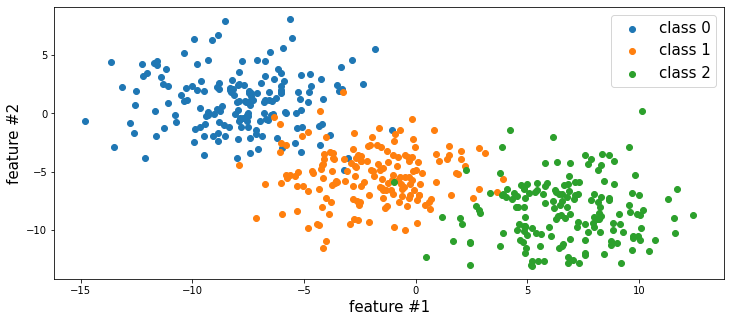

In [4]:
from sklearn.datasets import make_blobs

# generate a toy dataset with three blobs
X,y = make_blobs(n_samples=500, centers = 3, cluster_std=2.5)

# plot dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==0,0],X[y==0,1],label = 'class '+str(0))
ax.scatter(X[y==1,0],X[y==1,1],label = 'class '+str(1))
ax.scatter(X[y==2,0],X[y==2,1],label = 'class '+str(2))

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)

ax.legend(fontsize=15)

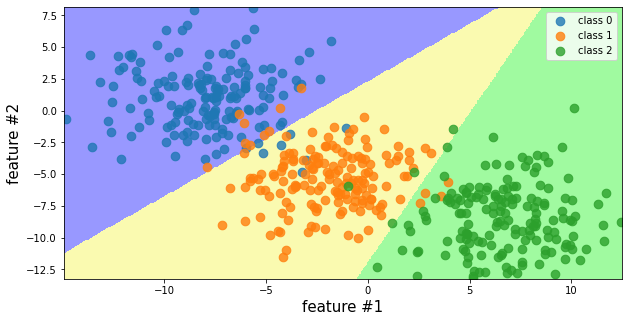

In [5]:

# instantiate the model
log_clf = LogisticRegression()

# fit the model
log_clf.fit(X, y)

# draw classification regions
draw_classification_regions(X,y,log_clf)

### Example 2: Two-moons dataset

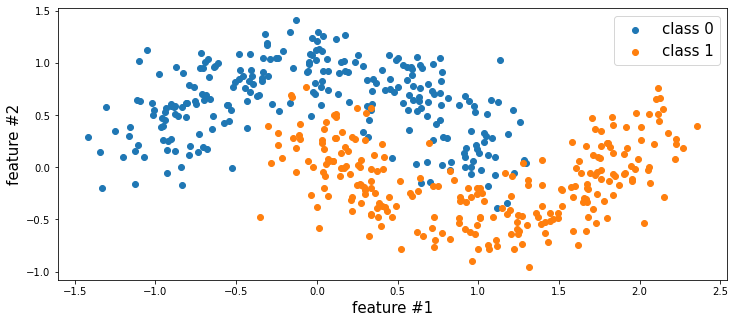

In [6]:
# generate and plot the two-moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,noise=0.2)

# plot dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==0,0],X[y==0,1],label = 'class '+str(0))
ax.scatter(X[y==1,0],X[y==1,1],label = 'class '+str(1))

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)

ax.legend(fontsize=15)

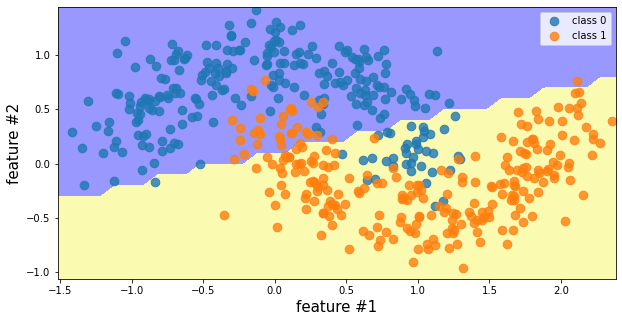

In [8]:
# instantiate the model
log_clf = LogisticRegression()

# fit the model
log_clf.fit(X, y)

# draw classification regions
draw_classification_regions(X,y,log_clf)

### Example 3: Two-circles dataset

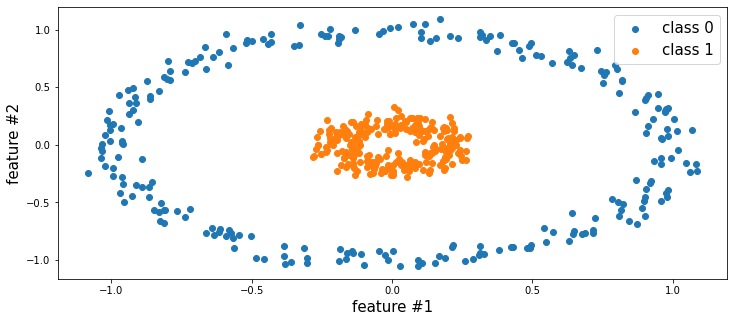

In [9]:
# run this cell to generate and plot the second toy dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,noise=0.05, factor=0.2)

# plot dataset
fig, ax = plt.subplots(figsize=(12,5))

ax.scatter(X[y==0,0],X[y==0,1],label = 'class '+str(0))
ax.scatter(X[y==1,0],X[y==1,1],label = 'class '+str(1))

ax.set_xlabel('feature #1', fontsize=15)
ax.set_ylabel('feature #2', fontsize=15)

ax.legend(fontsize=15)

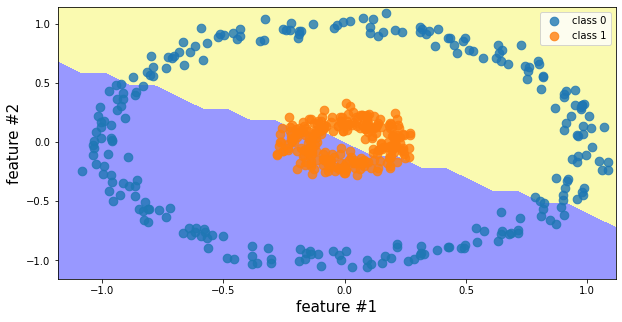

In [10]:
# instantiate the model
log_clf = LogisticRegression()

# fit the model
log_clf.fit(X, y)

# draw classification regions
draw_classification_regions(X,y,log_clf)